In [24]:
from pylab import *
import numpy as np

In [25]:
I=np.load('sampled_data.npz')

N = I["N"] #total number of qubits (system size)    

times = I["times"] # time points at which the simulated randomized measurements were performed ((1 ms , 3 ms 5 ms), evolution starting at t=0 with trapped ion Hamiltonian, including a decoherence model)

samples = I["samples"] # number of simulated experiments
NU = I["NU"] # number of unitaries per experiment
NM = I["NM"] # number of measurements per unitary

NAmax = I["NAmax"] # maximum subsystem size (we estimate renyi entropies for subsystems of size 1 to NAmax)
k_max = I["k_max"] # maximum value of k for the kth moment estimation (we estimate kth = 2 to k_max moments)

p_bshadow = I["p_bshadow"]  # estimated trace moments, of size (samples,length(times),NAmax,k_max-1)
S_bshadow = I["S_bshadow"]  # estimated Renyi entropies, of size (samples,length(times),NAmax,k_max-1)
p = I["p"] # exact values of the trace moments (from the simulation), of size (length(times),NAmax,k_max-1)
S = I["S"] # exact values of the Renyi entropies (from the simulation), of size (length(times),NAmax,k_max-1)

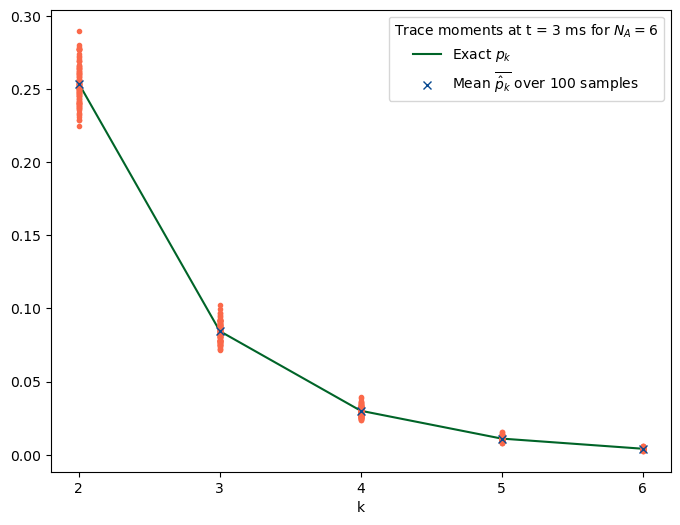

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(list(range(2, k_max+1)), p[1,-1,:], label='Exact $p_k$',color=cm.Greens(0.9))
ax.plot(list(range(2, k_max+1)), np.transpose(p_bshadow[:,1,-1,:]), '.',color= cm.Reds(0.5))
ax.plot(list(range(2, k_max+1)), np.mean(p_bshadow,axis=0)[1,-1,:], 'x', label='Mean $\overline{\hat{p}_k}$ over 100 samples',color=cm.Blues(0.9))

ax.set_xlabel('k')
ax.set_xticks(list(range(2, k_max+1)))

ax.legend(title = 'Trace moments at t = 3 ms for $N_A=6$')


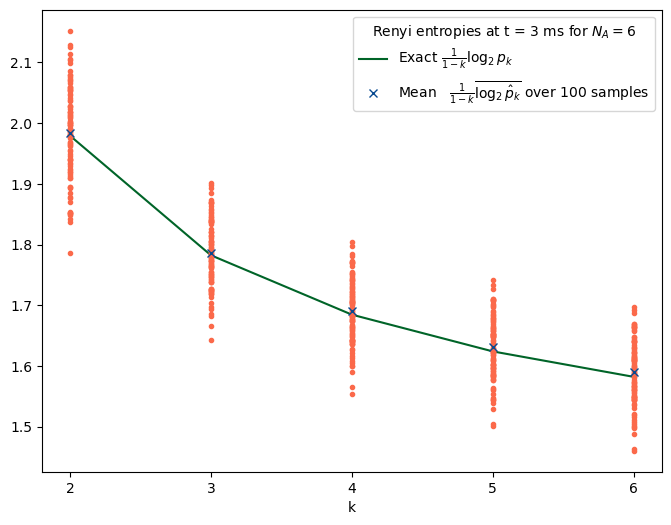

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(list(range(2, k_max+1)), S[1,-1,:], label=r'Exact $\frac{1}{1-k} \log_2 p_k$',color=cm.Greens(0.9))
ax.plot(list(range(2, k_max+1)), np.transpose(S_bshadow[:,1,-1,:]), '.',color= cm.Reds(0.5))
ax.plot(list(range(2, k_max+1)), np.mean(S_bshadow,axis=0)[1,-1,:], 'x', label=r'Mean   $\frac{1}{1-k} \overline{\log_2 \hat p_k}$ over 100 samples',color=cm.Blues(0.9))


ax.set_xlabel('k')
ax.set_xticks(list(range(2, k_max+1)))

ax.legend(title = 'Renyi entropies at t = 3 ms for $N_A=6$')